<b>PART-II<b>

<b>Used Arima model for crop price prediction(wheat price of Punjab)<b>

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
fields = ['Modal_Price', 'Price_Date']
df= pd.read_csv("ml_wheat.csv",skipinitialspace=True, usecols=fields)

In [3]:
df.Price_Date = pd.to_datetime(df.Price_Date, errors='coerce')

In [4]:
df=df.set_index('Price_Date')

In [5]:
df.head()

,Modal_Price
Price_Date,
2010-01-05,1100
2010-02-05,1100
2010-03-05,1100
2010-04-05,1100
2010-04-13,1100


In [6]:
data = df.copy()
y = data

In [7]:
y

,Modal_Price
Price_Date,
2010-01-05,1100
2010-02-05,1100
2010-03-05,1100
2010-04-05,1100
2010-04-13,1100
2010-04-14,1100
2010-04-15,1100
2010-04-16,1100
2010-04-17,1100


In [8]:
# The 'MS' string groups the data in buckets by start of the month
y = y['Modal_Price'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)


Price_Date
2010-01-01    1100.000000
2010-02-01    1100.000000
2010-03-01    1100.000000
2010-04-01    1100.000000
2010-05-01    1130.000000
2010-06-01    1105.000000
2010-07-01    1300.000000
2010-08-01    1100.000000
2010-09-01    1100.000000
2010-10-01    1100.000000
2010-11-01    1100.000000
2010-12-01    1100.000000
2011-01-01    1285.000000
2011-02-01    1096.000000
2011-03-01    1040.000000
2011-04-01    1120.000000
2011-05-01    1120.000000
2011-06-01    1110.000000
2011-07-01    1110.000000
2011-08-01    1110.000000
2011-09-01    1110.000000
2011-10-01    1110.000000
2011-11-01    1110.000000
2011-12-01    1120.000000
2012-01-01    1285.000000
2012-02-01    1285.000000
2012-03-01    1285.000000
2012-04-01    1285.000000
2012-05-01    1285.000000
2012-06-01    1285.000000
                 ...     
2016-07-01    1525.000000
2016-08-01    1525.000000
2016-09-01    1525.000000
2016-10-01    1525.000000
2016-11-01    1525.000000
2016-12-01    1525.000000
2017-01-01    1585.000000
2

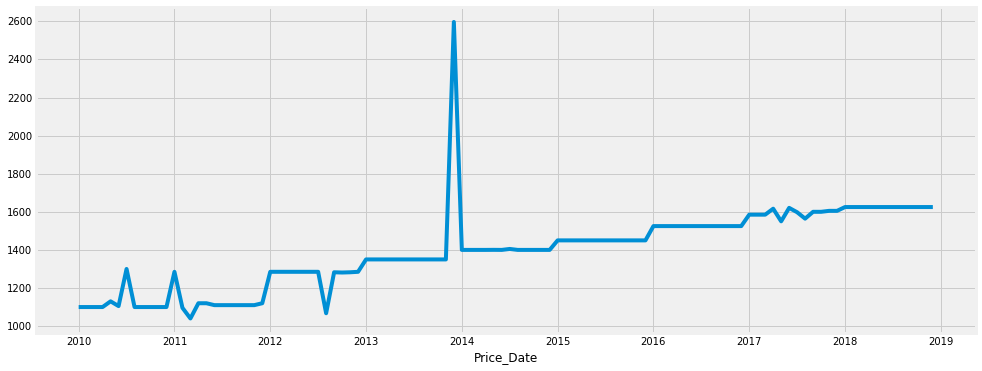

In [9]:
y.plot(figsize=(15, 6))
plt.show()

In [10]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0,3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [11]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            re_aic = results.aic
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1857.998825297107
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1555.0300145027516
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1404.776211162716
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1279.468860702869
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1122.374274866067
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:3097.2192491536175
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1208.1237880096553
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:983.7800821603964
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:2394.8330545587246
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1289.1376364068065
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1238.3296261804253
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:1093.3068817124308
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1135.0246770220906
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1117.7401830778601
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:2484.014313964449
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:1020.7766843647225
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:974.6107571881656
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:2748.8648074007706

ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:2797.7990583353694
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:1014.9533006025422
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:941.7688342221322
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:758.0967839881046
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:1074.2822312620258
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:1069.1619181374078
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:1019.244032466946
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:949.9332042600802
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:937.9533020628705
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:2897.7377723726763
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:811.4923080071632
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:801.6910807271828
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:759.9662211679633
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:1501.9175950602053
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1339.419010832265
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:1179.6335636591766
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:1406.8177317613074
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:1191.9258914044162
A

ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:1046.8269597390115
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:1254.4848535001743
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:1057.7090419145072
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:2705.2296983973006
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:1185.8175580751135
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:963.2672038872247
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:2475.4698557415363
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:1217.198126678152
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:1194.2989130795734
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:1049.9284444528448
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:1105.799812519385
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:1057.9470030801167
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:2672.3960307794964
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:1013.0975236733134
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:954.5403177431325
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:2524.0268702563208
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:1069.6310725097978
ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:1070.0226852511

ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:1014.3134232433936
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:968.00344218604
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:777.2639409671206
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:1075.3027009717582
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:1070.132164231714
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:1062.726065298076
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:951.2599154891623
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:939.2736772915438
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:nan
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:807.1429561826138
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:791.9313317741552
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:779.2513662947318
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:1315.8701140377943
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:1173.0583501198862
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:1032.822780624182
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:1237.5898846911773
ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:1040.4498967183258
ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:nan
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - A

ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:1253.786186232041
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:1058.977475313639
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:2841.574445454734
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:1189.163072604113
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:967.729593718483
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:2492.3559998609207
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:1195.8529201117994
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1197.8171735596886
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:1042.3891010694808
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:1083.941294940789
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:1060.9279952568584
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:2818.052092128993
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:989.9740853033634
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:956.8683571290154
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:773.129145848636
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:1051.8868377025126
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:1043.7181772401564
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:1034.6918291131124
ARIM

In [12]:
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, re_aic.min()))

ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:804.846046979585


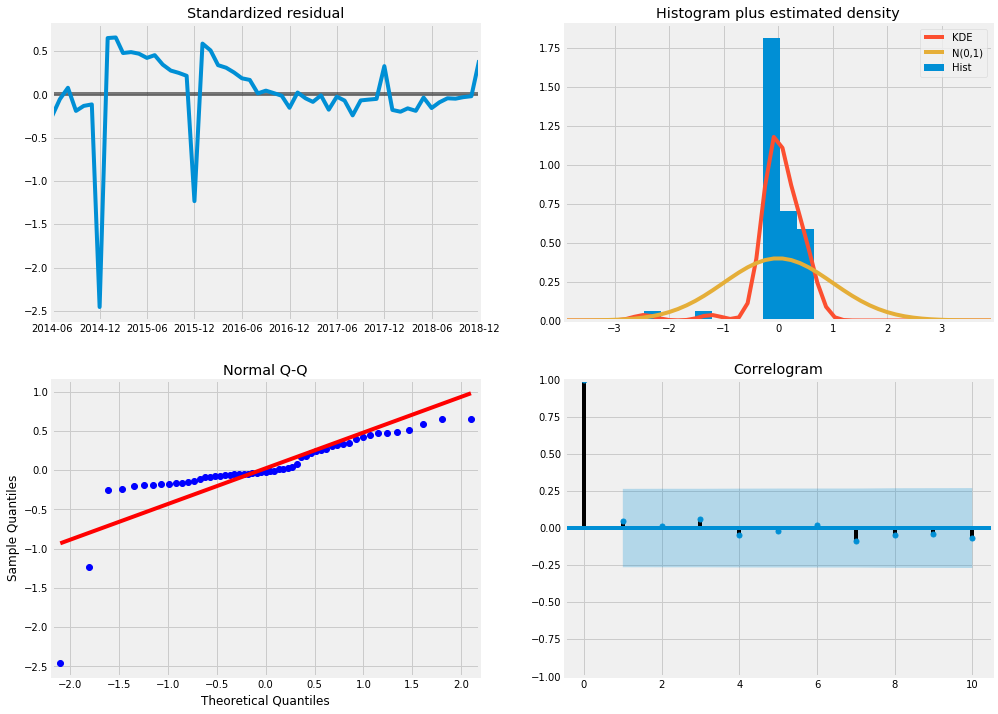

In [13]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()

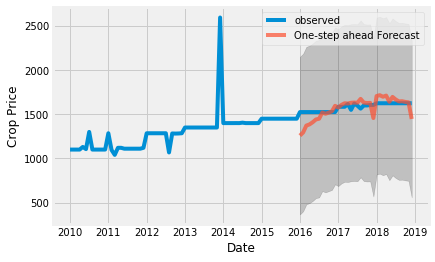

In [28]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Crop Price')
plt.legend()

plt.show()

In [16]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4771.27


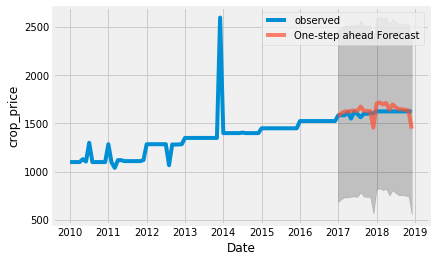

In [17]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('crop_price')
plt.legend()

plt.show()

In [18]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4771.27


In [19]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

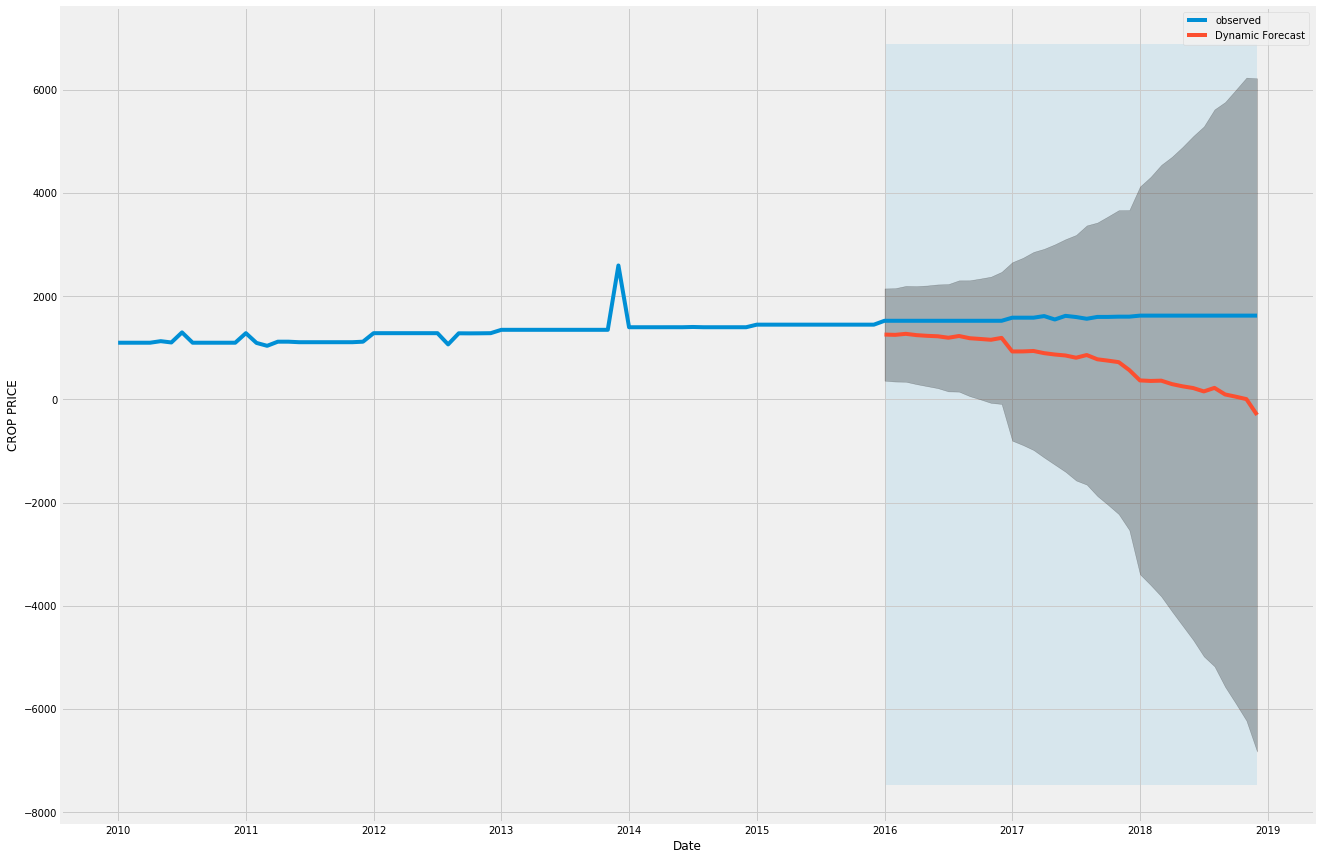

In [20]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')

plt.legend()
plt.show()

In [21]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 942811.03


<b>Forecast of 20 steps ahead in future<b>

In [22]:
# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

<b>The predicted prices are:<b>

In [23]:
pred_ci

,lower Modal_Price,upper Modal_Price
2019-01-01,786.306815,2564.503867
2019-02-01,783.544999,2581.983537
2019-03-01,751.436598,2596.027050
2019-04-01,745.196549,2629.150804
2019-05-01,684.651593,2617.678538
2019-06-01,690.347111,2680.628090
2019-07-01,645.023630,2701.781749
2019-08-01,596.002577,2728.424973
2019-09-01,560.135497,2777.401538
2019-10-01,511.772915,2822.901033


<b>Save the csv in desired location<b>

In [24]:
pred_ci.to_csv("pred_wheat_price.csv")

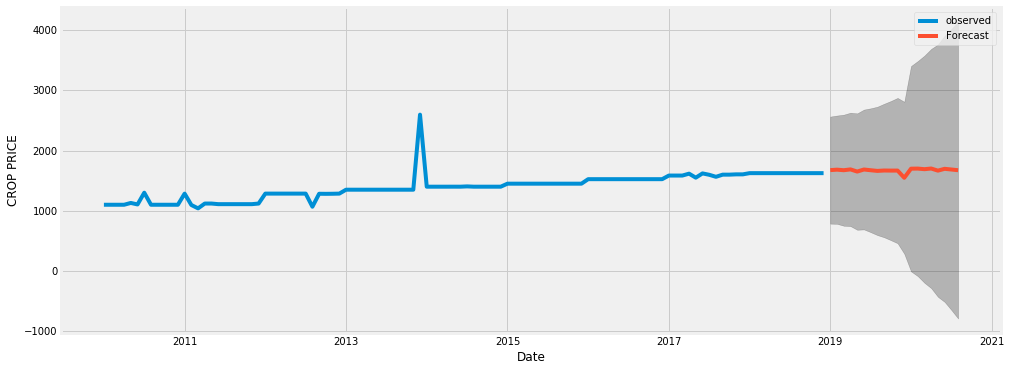

In [25]:
ax = y.plot(label='observed', figsize=(15,6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')

plt.legend()
plt.show()